# **Project Name**    - Sentiment Analysis of Zomato Customer Review






##### **Project Type**    - Unsupervised ML
##### **Contribution**    - Individual
##### **Name - Avinash Singh**
<!-- ##### **Team Member 2 -**
##### **Team Member 3 -**
##### **Team Member 4 -** -->

# **Project Summary -**

**Zomato Customer Review Analysis using NLP and Data Analytics**

The rapid growth of online food delivery platforms has made customer feedback a crucial source of information for improving service quality and business decision-making. Zomato, being one of the leading food delivery and restaurant discovery platforms, generates a vast amount of customer reviews that reflect user experiences, preferences, and satisfaction levels. The objective of this project is to analyze Zomato customer reviews to extract meaningful insights using data analytics and Natural Language Processing (NLP) techniques.

This project focuses on
* understanding customer sentiment,
* identifying major factors influencing restaurant ratings and
* uncovering patterns in customer feedback.

The dataset used for this analysis consists of customer reviews, ratings, and associated metadata collected from Zomato. The analysis begins with data understanding and preprocessing, where missing values, duplicate entries, and irrelevant information are handled to ensure data quality. Textual data is cleaned by removing punctuation, stopwords, and special characters, followed by tokenization and lemmatization to prepare the reviews for further analysis.

Exploratory Data Analysis (EDA) is performed to gain insights into rating distributions, review length patterns, and frequently occurring words. Visualization techniques are used to represent customer rating trends, sentiment distribution, and commonly discussed topics in reviews. This helps in understanding overall customer satisfaction and highlights areas that customers frequently praise or criticize.

A key component of the project is sentiment analysis, where NLP techniques are applied to classify customer reviews into positive, negative, or neutral categories. Sentiment scores are calculated using lexicon-based or machine learning-based approaches to quantify customer opinions. The relationship between sentiment scores and numerical ratings is also analyzed to determine how closely textual sentiment aligns with customer ratings. This comparison provides valuable insight into cases where customer sentiment may differ from assigned ratings.

The project further explores common themes in customer feedback such as food quality, service efficiency, pricing, delivery experience, and hygiene. By identifying frequently mentioned keywords and phrases, the analysis highlights the factors that most significantly impact customer satisfaction. These insights can be valuable for restaurant owners and platform administrators to improve service quality, address customer concerns, and enhance overall user experience.

From a technical perspective, this project demonstrates the practical application of Python programming, data manipulation using libraries such as Pandas and NumPy, data visualization using Matplotlib or similar tools, and NLP techniques for text analysis. It bridges the gap between theoretical concepts and real-world data analysis by solving a business-oriented problem using structured and unstructured data.

In conclusion, the Zomato Customer Review Analysis project provides a comprehensive understanding of customer behavior and sentiment through data-driven methods. The insights derived from this analysis can support better decision-making for restaurants and food delivery platforms, ultimately leading to improved customer satisfaction. The project also serves as a strong example of applying data analytics and NLP techniques in a real-world scenario, making it relevant for academic evaluation as well as industry-oriented applications.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


Due to the growing demand for online food ordering and late-night dining, customers often face difficulty in selecting reliable restaurants from numerous options on Zomato. Ratings alone are insufficient to represent true customer experience.

This project aims to analyze customer reviews using sentiment analysis to provide accurate insights and support better restaurant selection.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer


### Dataset Loading

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# File paths for the datasets
metadata_path = "/content/drive/MyDrive/Colab Notebooks/Restaurant names and Metadata.csv"
reviews_path = "/content/drive/MyDrive/Colab Notebooks/Restaurant reviews.csv"

# Loading datasets
try:
    metadata_df = pd.read_csv(metadata_path)
    reviews_df = pd.read_csv(reviews_path)

    print("Datasets loaded successfully!")

except FileNotFoundError as e:
    print("File not found. Please check the file path.")
    print(e)

except Exception as e:
    print("An unexpected error occurred while loading the data.")
    print(e)


Datasets loaded successfully!


### Dataset First View

In [ ]:
# Dataset First Look
try:
    # Displaying the first few rows of the metadata dataset
    print("Metadata Dataset:")
    display(metadata_df.head())

    # Displaying the first few rows of the reviews dataset
    print("\nReviews Dataset:")
    display(reviews_df.head())

except NameError as e:
    print("One or both of the datasets are not defined.")
    print(e)

except Exception as e:
    print("An unexpected error occurred while displaying the data.")
    print(e)


Metadata Dataset:


,Name,Links,Cost,Collections,Cuisines,Timings
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese",11 AM to 11 PM
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,"1,300","Great Buffets, Hyderabad's Hottest","Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM"
3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-h...,800,Late Night Restaurants,"Biryani, North Indian, Chinese, Seafood, Bever...",12 Noon to 2 AM
4,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon...,"1,200","Best Bars & Pubs, Food Hygiene Rated Restauran...","Asian, Continental, North Indian, Chinese, Med...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no..."



Reviews Dataset:


,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
print("Metadata Dataset:")
print("Total rows are ",metadata_df.shape[0])
print("Total columns are ",metadata_df.shape[1])
print("\nReviews Dataset:")
print("Total rows are ",reviews_df.shape[0])
print("Total columns are ",reviews_df.shape[1])

Metadata Dataset:
Total rows are  105
Total columns are  6

Reviews Dataset:
Total rows are  10000
Total columns are  7


### Dataset Information

In [ ]:
# Metadata dataset structure
print("\n Metadata Dataset Info:")
metadata_df.info()

# Reviews dataset structure
print("\n Reviews Dataset Info:")
reviews_df.info()



 Metadata Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         105 non-null    object
 1   Links        105 non-null    object
 2   Cost         105 non-null    object
 3   Collections  51 non-null     object
 4   Cuisines     105 non-null    object
 5   Timings      104 non-null    object
dtypes: object(6)
memory usage: 5.1+ KB

 Reviews Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Restaurant  10000 non-null  object
 1   Reviewer    9962 non-null   object
 2   Review      9955 non-null   object
 3   Rating      9962 non-null   object
 4   Metadata    9962 non-null   object
 5   Time        9962 non-null   object
 6   Pictures    10000 non-null  int64 
dtypes: int6

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
# Checking duplicate rows in Metadata dataset
print("\nDuplicate rows in Metadata Dataset:", metadata_df.duplicated().sum())

# Checking duplicate rows in Reviews dataset
print("\nDuplicate rows in Reviews Dataset:", reviews_df.duplicated().sum())




Duplicate rows in Metadata Dataset: 0

Duplicate rows in Reviews Dataset: 36


#### Missing Values/Null Values

In [ ]:
# Percentage of missing values
missing_metadata = (metadata_df.isnull().sum() / len(metadata_df)) * 100
missing_reviews = (reviews_df.isnull().sum() / len(reviews_df)) * 100

print("\nMissing Value Percentage (Metadata Dataset):")
display(missing_metadata)

print("\nMissing Value Percentage (Reviews Dataset):")
display(missing_reviews)

# Missing Values count
# Checking missing values in Metadata dataset
print()
print("\nMissing values count (Metadata Dataset):")
display(metadata_df.isnull().sum())

# Checking missing values in Reviews dataset
print("\nMissing values count (Reviews Dataset):")
display(reviews_df.isnull().sum())



Missing Value Percentage (Metadata Dataset):


,0
Name,0.000000
Links,0.000000
Cost,0.000000
Collections,51.428571
Cuisines,0.000000
Timings,0.952381



Missing Value Percentage (Reviews Dataset):


,0
Restaurant,0.00
Reviewer,0.38
Review,0.45
Rating,0.38
Metadata,0.38
Time,0.38
Pictures,0.00




Missing values count (Metadata Dataset):


,0
Name,0
Links,0
Cost,0
Collections,54
Cuisines,0
Timings,1



Missing values count (Reviews Dataset):


,0
Restaurant,0
Reviewer,38
Review,45
Rating,38
Metadata,38
Time,38
Pictures,0


**Why Missing Value Analysis is Important:**

Missing values can negatively affect data analysis and machine learning model performance. Identifying missing values helps in deciding whether to remove, replace, or retain them based on business relevance and data distribution. In this project, missing values are analyzed separately for restaurant metadata and customer reviews to ensure data quality before further analysis

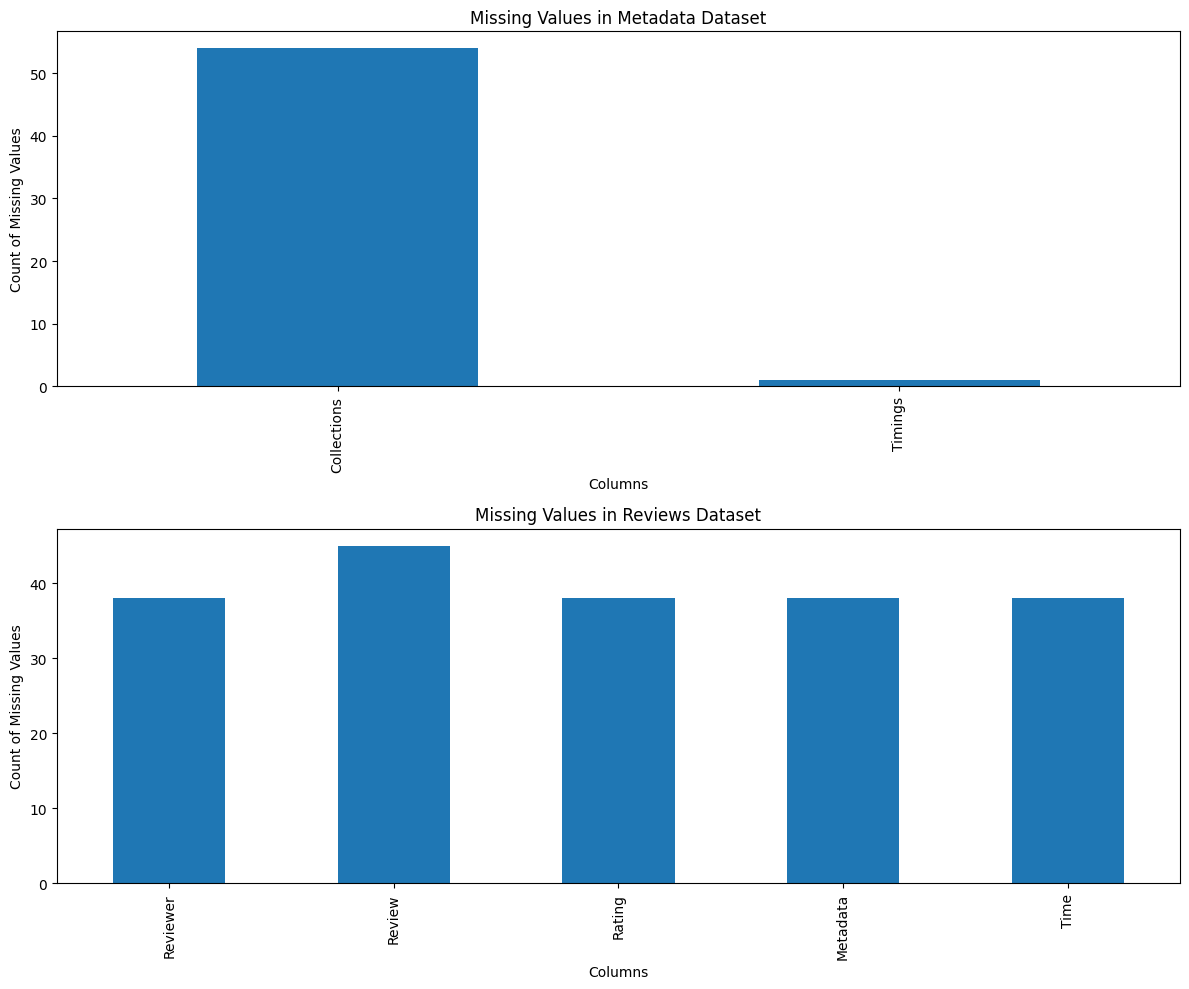

In [ ]:
# import matplotlib.pyplot as plt

# Calculate missing values
missing_metadata = metadata_df.isnull().sum()
missing_metadata = missing_metadata[missing_metadata > 0]

missing_reviews = reviews_df.isnull().sum()
missing_reviews = missing_reviews[missing_reviews > 0]

# Create subplots
fig, axes = plt.subplots(2, 1, figsize=(12, 10))

# Plot for Metadata dataset
missing_metadata.plot(kind='bar', ax=axes[0])
axes[0].set_title("Missing Values in Metadata Dataset")
axes[0].set_xlabel("Columns")
axes[0].set_ylabel("Count of Missing Values")

# Plot for Reviews dataset
missing_reviews.plot(kind='bar', ax=axes[1])
axes[1].set_title("Missing Values in Reviews Dataset")
axes[1].set_xlabel("Columns")
axes[1].set_ylabel("Count of Missing Values")

plt.tight_layout()
plt.show()


**Why this chart?**

A bar chart is used because it provides a clear comparison of missing values across different columns, making it easier to identify which features require data cleaning or imputation.

**What insights are found from the chart?**

The chart highlights the columns with missing data and their magnitude. This helps identify whether missing values are negligible or significant and which columns need immediate attention during preprocessing.

### What did you know about your dataset?

This project uses two datasets obtained from the Zomato platform: a restaurant metadata dataset and a customer reviews dataset.
* The restaurant metadata dataset contains structured information such as restaurant names, locations, cuisines, and other descriptive attributes.
* The customer reviews dataset consists of unstructured textual data along with customer ratings, reflecting individual dining experiences.

The combination of structured and unstructured data allows for comprehensive analysis, including exploratory data analysis, sentiment analysis, and machine learning-based prediction. The metadata dataset helps in contextual analysis such as location-wise or cuisine-wise performance, while the reviews dataset is primarily used to understand customer sentiment and satisfaction levels. Together, these datasets enable univariate, bivariate, and multivariate analysis, aligning with real-world business use cases

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
print("Metadata Dataset Columns:")
print(metadata_df.columns)

print("\nReviews Dataset Columns:")
print(reviews_df.columns)

Metadata Dataset Columns:
Index(['Name', 'Links', 'Cost', 'Collections', 'Cuisines', 'Timings'], dtype='object')

Reviews Dataset Columns:
Index(['Restaurant', 'Reviewer', 'Review', 'Rating', 'Metadata', 'Time',
       'Pictures'],
      dtype='object')


In [ ]:
# Dataset Describe
print("\nMetadata Dataset Describe:")
display(metadata_df.describe(include="all"))

print("\nReviews Dataset Describe:")
display(reviews_df.describe(include="all"))


Metadata Dataset Describe:


,Name,Links,Cost,Collections,Cuisines,Timings
count,105,105,105,51,105,104
unique,105,105,29,42,92,77
top,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,500,Food Hygiene Rated Restaurants in Hyderabad,"North Indian, Chinese",11 AM to 11 PM
freq,1,1,13,4,4,6



Reviews Dataset Describe:


,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
count,10000,9962,9955,9962,9962,9962,10000.000000
unique,100,7446,9364,10,2477,9782,NaN
top,Beyond Flavours,Parijat Ray,good,5,1 Review,7/29/2018 20:34,NaN
freq,100,13,237,3832,919,3,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,0.748600
std,NaN,NaN,NaN,NaN,NaN,NaN,2.570381
min,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,0.000000


### Variables Description

### Variable Description

This section describes the variables present in the datasets used for analysis.

#### Dataset 1: Restaurant Names and Metadata



| Variable Name  | Data Type   | Description|
|---------------|---------------|--------------|
|**Name** | Categorical | Name of the restaurant listed on Zomato
|**Links** | Categorical | URL link of the restaurant’s Zomato page
|**Cost** | Numerical   | Per person estimated cost of dining
|**Collection** | Categorical | Zomato collection or category tag assigned to the restaurant
|**Cuisines** | Categorical | Types of cuisines served by the restaurant


#### Dataset 2: Restaurant Reviews

| Variable Name       | Data Type   | Description                             |
| ------------------- | ----------- | --------------------------------------- |
| **Restaurant Name** | Categorical | Name of the restaurant being reviewed   |
| **Reviewer Name**   | Categorical | Name/identifier of the customer         |
| **Review**          | Text        | Written customer feedback               |
| **Rating**          | Numerical   | Rating given by the customer            |
| **Metadata**          | Categorical   | Reviewer metadata- No of review and followers            |
| **Review Time**     | Categorical | Time or date when the review was posted |
| **Pictures**          | Numerical   | No of pictures posted with review         |



### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
print("Unique values in Metadata Dataset:")
print(metadata_df.nunique())

print("\nUnique values in Reviews Dataset:")
print(reviews_df.nunique())


Unique values in Metadata Dataset:
Name           105
Links          105
Cost            29
Collections     42
Cuisines        92
Timings         77
dtype: int64

Unique values in Reviews Dataset:
Restaurant     100
Reviewer      7446
Review        9364
Rating          10
Metadata      2477
Time          9782
Pictures        36
dtype: int64


**Key Observations:**

* Restaurant and reviewer names usually have high cardinality.

* Rating variables have limited unique values and are important for modeling.

* Categorical variables like cuisines or collections help in segmentation analysis.

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.
# ==============================
# DATA WRANGLING
# ==============================

# 1. Create copies to avoid modifying original data
metadata_clean = metadata_df.copy()
reviews_clean = reviews_df.copy()

# 2. Handle missing values

# Drop rows where critical information is missing
metadata_clean.dropna(subset=['Name', 'Cost'], inplace=True)
reviews_clean.dropna(subset=['Restaurant', 'Review', 'Rating'], inplace=True)

# 3. Remove duplicate records
metadata_clean.drop_duplicates(inplace=True)
reviews_clean.drop_duplicates(inplace=True)

# 4. Standardize text columns (strip spaces & lowercase where applicable)
metadata_clean['Name'] = metadata_clean['Name'].str.strip()
metadata_clean['Cuisines'] = metadata_clean['Cuisines'].str.lower().str.strip()

reviews_clean['Restaurant'] = reviews_clean['Restaurant'].str.strip()
reviews_clean['Review'] = reviews_clean['Review'].str.lower().str.strip()

# 5. Convert Cost and Rating to numeric (safety check)
metadata_clean['Cost'] = pd.to_numeric(metadata_clean['Cost'], errors='coerce')
reviews_clean['Rating'] = pd.to_numeric(reviews_clean['Rating'], errors='coerce')

# Drop rows created with NaN after conversion
metadata_clean.dropna(subset=['Cost'], inplace=True)
reviews_clean.dropna(subset=['Rating'], inplace=True)

# 6. Create a new feature: Review Length
reviews_clean['Review_Length'] = reviews_clean['Review'].apply(len)

# 7. Merge datasets on Restaurant Name
final_df = pd.merge(
    reviews_clean,
    metadata_clean,
    left_on='Restaurant',
    right_on='Name',
    how='inner'
)

# 8. Reset index for clean dataset
final_df.reset_index(drop=True, inplace=True)

print("✅ Data wrangling completed successfully")
print("Final Dataset Shape:", final_df.shape)


✅ Data wrangling completed successfully
Final Dataset Shape: (6269, 14)


In [ ]:
#final cleaned dataset view
display(final_df.head(10))

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures,Review_Length,Name,Links,Cost,Collections,Cuisines,Timings
0,Beyond Flavours,Rusha Chakraborty,"the ambience was good, food was quite good . h...",5.0,"1 Review , 2 Followers",5/25/2019 15:54,0,222,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800.0,"Food Hygiene Rated Restaurants in Hyderabad, C...","chinese, continental, kebab, european, south i...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Beyond Flavours,Anusha Tirumalaneedi,ambience is too good for a pleasant evening. s...,5.0,"3 Reviews , 2 Followers",5/25/2019 14:20,0,144,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800.0,"Food Hygiene Rated Restaurants in Hyderabad, C...","chinese, continental, kebab, european, south i...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
2,Beyond Flavours,Ashok Shekhawat,a must try.. great food great ambience. thnx f...,5.0,"2 Reviews , 3 Followers",5/24/2019 22:54,0,189,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800.0,"Food Hygiene Rated Restaurants in Hyderabad, C...","chinese, continental, kebab, european, south i...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
3,Beyond Flavours,Swapnil Sarkar,soumen das and arun was a great guy. only beca...,5.0,"1 Review , 1 Follower",5/24/2019 22:11,0,148,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800.0,"Food Hygiene Rated Restaurants in Hyderabad, C...","chinese, continental, kebab, european, south i...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
4,Beyond Flavours,Dileep,food is good.we ordered kodi drumsticks and ba...,5.0,"3 Reviews , 2 Followers",5/24/2019 21:37,0,160,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800.0,"Food Hygiene Rated Restaurants in Hyderabad, C...","chinese, continental, kebab, european, south i...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
5,Beyond Flavours,Nagabhavani K,"ambiance is good, service is good, food is apr...",5.0,1 Review,5/24/2019 15:22,0,161,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800.0,"Food Hygiene Rated Restaurants in Hyderabad, C...","chinese, continental, kebab, european, south i...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
6,Beyond Flavours,Jamuna Bhuwalka,"its a very nice place, ambience is different, ...",5.0,1 Review,5/24/2019 1:02,0,170,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800.0,"Food Hygiene Rated Restaurants in Hyderabad, C...","chinese, continental, kebab, european, south i...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
7,Beyond Flavours,Sandhya S,well after reading so many reviews finally vis...,4.0,1 Review,5/23/2019 15:01,0,288,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800.0,"Food Hygiene Rated Restaurants in Hyderabad, C...","chinese, continental, kebab, european, south i...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
8,Beyond Flavours,Akash Thorat,"excellent food , specially if you like spicy f...",5.0,"1 Review , 1 Follower",5/22/2019 23:12,0,194,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800.0,"Food Hygiene Rated Restaurants in Hyderabad, C...","chinese, continental, kebab, european, south i...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
9,Beyond Flavours,Smarak Patnaik,came for the birthday treat of a close friend....,5.0,"1 Review , 1 Follower",5/22/2019 22:37,0,295,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800.0,"Food Hygiene Rated Restaurants in Hyderabad, C...","chinese, continental, kebab, european, south i...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"


In [ ]:
# finding detail about final dataset
final_df.describe()



,Rating,Pictures,Review_Length,Cost
count,6269.000000,6269.000000,6269.000000,6269.000000
mean,3.436274,0.540278,229.851970,553.070665
std,1.541326,1.989406,302.047946,190.548611
min,1.000000,0.000000,1.000000,150.000000
25%,2.000000,0.000000,43.000000,400.000000
50%,4.000000,0.000000,168.000000,550.000000
75%,5.000000,0.000000,278.000000,700.000000
max,5.000000,41.000000,5212.000000,900.000000


### What all manipulations have you done and insights you found?

### Data Wrangling Summary and Insights

Several data wrangling steps were performed to improve data quality and prepare the dataset for analysis and modeling.

Missing values were handled by removing records with missing critical information such as restaurant name, review text, rating, and cost. These fields are essential for sentiment analysis and business interpretation, and incomplete records could lead to misleading insights.

Duplicate records were identified and removed to prevent biased analysis caused by repeated restaurant or review entries.

Textual columns such as restaurant names, cuisines, and reviews were standardized by removing extra spaces and converting text to lowercase. This step ensured consistency and avoided mismatches during merging and text analysis.

Numerical columns such as cost and rating were explicitly converted to numeric data types to avoid hidden data type issues during analysis and visualization.

A new feature called **Review Length** was created to measure the size of customer feedback. This feature helps in understanding whether longer reviews tend to be more critical or detailed compared to shorter ones.

Finally, the restaurant metadata and customer reviews datasets were merged using restaurant name as a common key. This created a unified dataset combining structured restaurant information with unstructured customer feedback.

### Key Insights from Data Wrangling
- Data cleaning significantly reduced noise and improved dataset reliability.
- Standardization of text fields was essential for accurate merging.
- Review length emerged as a potentially useful feature for sentiment and engagement analysis.
- The merged dataset enables deeper univariate, bivariate, and multivariate analysis with strong business relevance.


## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

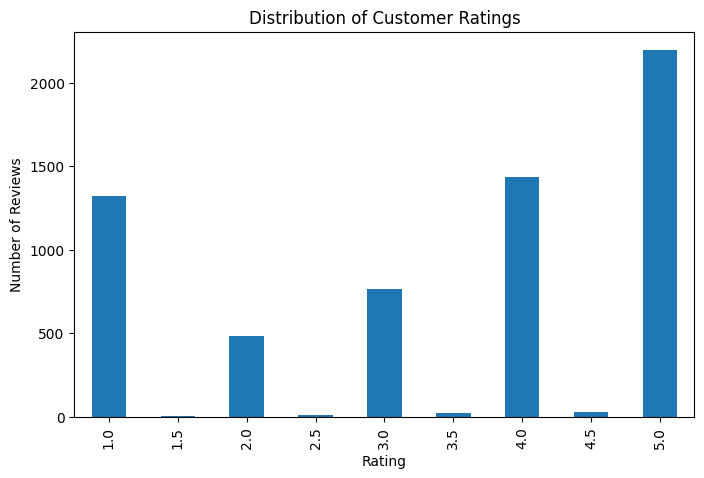

In [ ]:
# Chart - 1 visualization code

#Distribution of Customer Ratings
plt.figure(figsize=(8, 5))
final_df['Rating'].value_counts().sort_index().plot(kind='bar')
plt.title("Distribution of Customer Ratings")
plt.xlabel("Rating")
plt.ylabel("Number of Reviews")
plt.show()


##### 1. Why did you pick the specific chart?

A bar chart is chosen to visualize the frequency of discrete rating values. Since customer ratings are categorical numerical values, a bar chart clearly represents how often each rating is given.

##### 2. What is/are the insight(s) found from the chart?

The chart shows the distribution of customer ratings across restaurants. It helps identify whether customers generally provide high ratings or if low ratings are frequent, indicating dissatisfaction. A skew toward higher ratings suggests overall positive customer experience.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

If most ratings are high, it reflects strong customer satisfaction, positively impacting restaurant reputation and platform trust. However, a noticeable presence of low ratings may indicate service or quality issues that require attention, as they can negatively affect customer retention and restaurant rankings.

#### Chart - 2

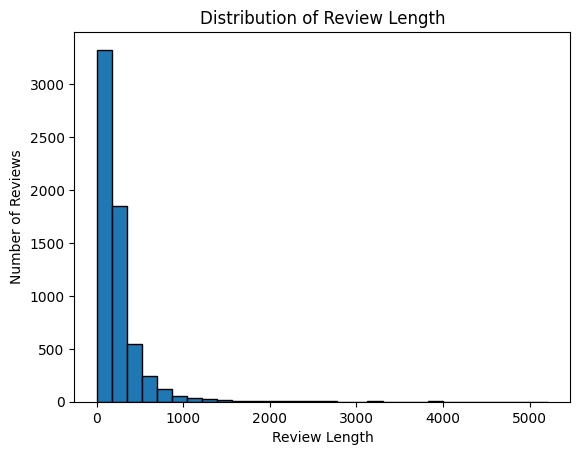

In [ ]:
# Chart - 2 visualization code

#Distribution of review length
final_df['Review_Length'].plot(kind='hist', bins=30, edgecolor='black')
plt.title("Distribution of Review Length")
plt.xlabel("Review Length")
plt.ylabel("Number of Reviews")
plt.show()


##### 1. Why did you pick the specific chart?

A histogram is used because review length is a continuous numerical variable. This chart helps visualize the frequency distribution of review lengths and shows how customer feedback varies from short to detailed reviews.

##### 2. What is/are the insight(s) found from the chart?

The histogram shows that most customer reviews are relatively short, indicating that users often provide brief feedback. A smaller number of reviews are significantly longer, suggesting that detailed reviews are usually written when customers have strong positive or negative experiences.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Short reviews indicate quick user engagement and ease of feedback submission, which is positive for platform participation. However, longer reviews provide richer information about customer experience.

Restaurants and platforms can prioritize analyzing longer reviews to identify detailed issues or strong satisfaction drivers. Ignoring long reviews may lead to missed insights about service gaps or improvement opportunities.

#### Chart - 3

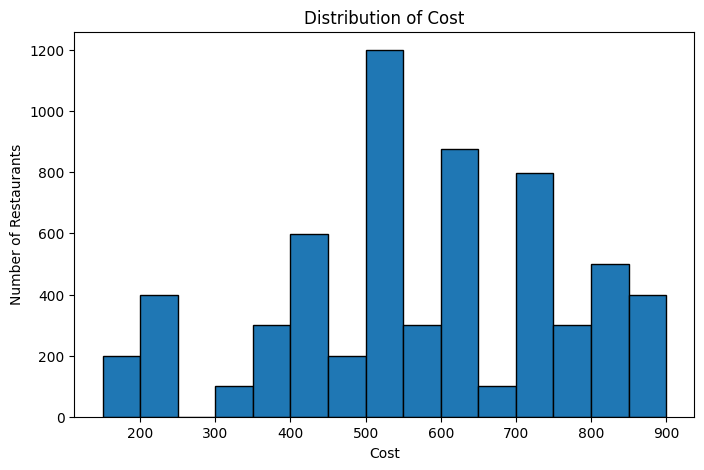

In [ ]:
# Chart - 3 visualization code
# Distribution of cost
plt.figure(figsize=(8, 5))
final_df['Cost'].plot(kind='hist',bins=15,edgecolor="black")
plt.title("Distribution of Cost")
plt.xlabel("Cost")
plt.ylabel("Number of Restaurants")
plt.show()

##### 1. Why did you pick the specific chart?

A histogram is chosen because cost is a numerical variable. The histogram helps visualize how restaurant prices are distributed across different cost ranges, making it easier to identify budget and premium segments

##### 2. What is/are the insight(s) found from the chart?

The chart shows that a large number of restaurants fall within lower to mid-price ranges, while fewer restaurants operate in the high-cost segment. This indicates that the platform is dominated by budget-friendly and mid-range restaurants.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The dominance of affordable restaurants positively impacts customer accessibility and order volume. However, limited high-end options may restrict premium customer segments.

Restaurants can use this insight to adjust pricing strategies or target specific customer groups based on demand.

#### Chart - 4

In [ ]:
# Split multiple cuisines and explode into separate rows
cuisine_series = final_df['Cuisines'].str.split(',').explode().str.strip()

# Count cuisine frequency
cuisine_counts = cuisine_series.value_counts()


# Select top 10 cuisines
top_cuisines = cuisine_counts.head(15)


In [ ]:
print(cuisine_counts)
print("Total different cuisines are ",len(cuisine_counts))
print(type(cuisine_counts))

Cuisines
north indian     3395
chinese          2695
biryani          1498
fast food        1276
desserts         1099
south indian      700
cafe              600
continental       599
andhra            500
burger            477
beverages         400
bakery            399
american          377
asian             300
momos             300
mughlai           300
hyderabadi        299
arabian           200
street food       200
kebab             200
seafood           199
ice cream         199
salad             177
european          100
healthy food      100
lebanese          100
wraps             100
indonesian        100
thai              100
italian           100
north eastern     100
pizza              99
Name: count, dtype: int64
Total different cuisines are  32
<class 'pandas.core.series.Series'>


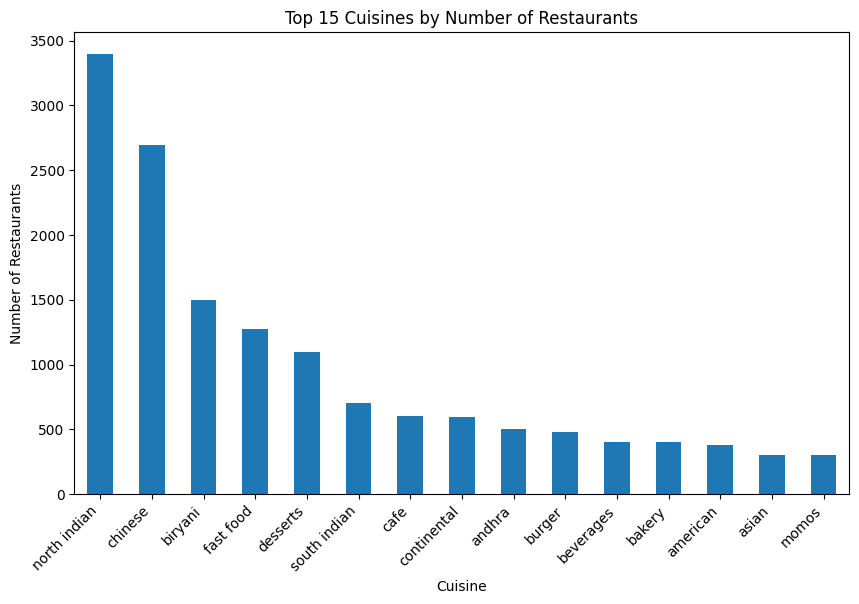

In [ ]:
# Chart - 4 visualization code
plt.figure(figsize=(10, 6))
top_cuisines.plot(kind='bar')
plt.title("Top 15 Cuisines by Number of Restaurants")
plt.xlabel("Cuisine")
plt.ylabel("Number of Restaurants")
plt.xticks(rotation=45, ha='right')
plt.show()




##### 1. Why did you pick the specific chart?

A bar chart is used to compare the frequency of different cuisine types. Since there are many cuisine categories, only the top 10 cuisines are visualized to maintain clarity and focus on the most popular segments.

##### 2. What is/are the insight(s) found from the chart?

The chart shows that a small number of cuisines dominate the platform, while many cuisines have limited restaurant presence. This indicates customer preference concentration toward certain cuisine types.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Popular cuisines indicate high demand and stable business opportunities for restaurants. However, over-reliance on a few cuisines may reduce variety on the platform.

Introducing or promoting underrepresented cuisines can help attract niche customers and improve platform diversity.

#### Chart - 5

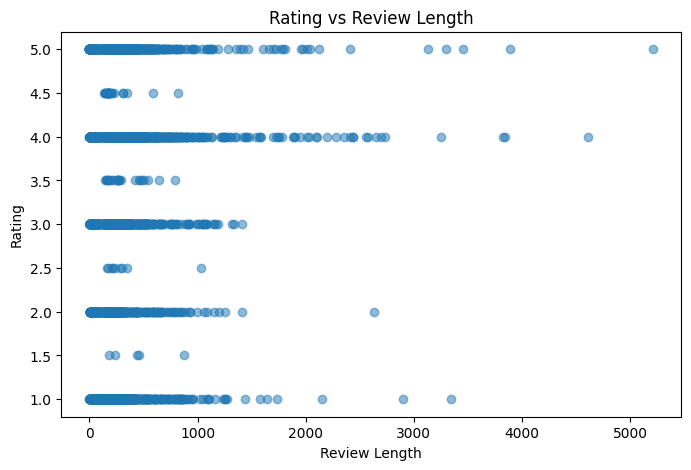

In [ ]:
# Chart - 5 visualization code
#Rating vs Reviews length

plt.figure(figsize=(8, 5))
plt.scatter(final_df['Review_Length'], final_df['Rating'], alpha=0.5)
plt.title("Rating vs Review Length")
plt.xlabel("Review Length")
plt.ylabel("Rating")
plt.show()




##### 1. Why did you pick the specific chart?

A scatter plot is chosen because it is ideal for visualizing the relationship between two numerical variables. Review length and rating are both numerical, and a scatter plot helps identify patterns, trends, or correlations between them.

##### 2. What is/are the insight(s) found from the chart?

This scatter plot depicts that more people providing reviews upto 1000 characters.
It can be observed that very short reviews are spread across all rating values, while longer reviews tend to cluster more around extreme ratings (very high or very low).

However there are some who provide detailed review about their experience.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

This insight helps businesses prioritize longer reviews for deeper sentiment analysis, as they often contain detailed feedback about service quality, food, or delivery issues.

Ignoring longer reviews may lead to missed opportunities for improvement, while leveraging them can positively impact customer satisfaction and restaurant performance.

#### Chart - 6

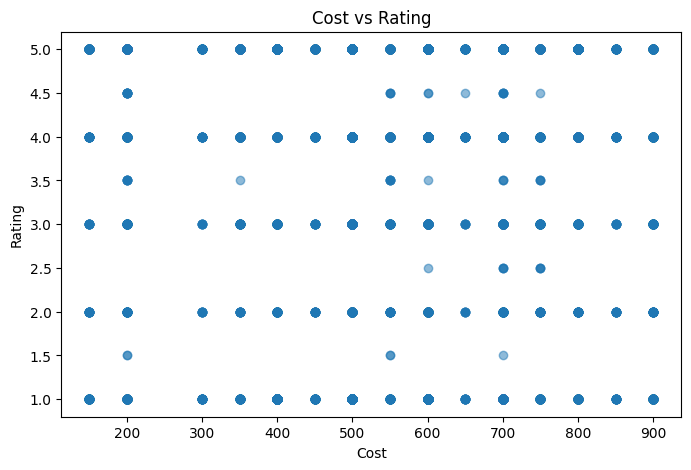

In [ ]:
# Chart - 6 visualization code

plt.figure(figsize=(8, 5))
plt.scatter(final_df['Cost'], final_df['Rating'],alpha=0.5)
plt.title("Cost vs Rating")
plt.xlabel("Cost")
plt.ylabel("Rating")
plt.show()


##### 1. Why did you pick the specific chart?

A scatter plot is used because both cost and rating are numerical variables. This chart helps visualize whether there is any relationship between restaurant pricing and customer ratings, such as whether higher-priced restaurants tend to receive better ratings.

##### 2. What is/are the insight(s) found from the chart?

The chart shows that higher cost does not necessarily guarantee higher ratings. Restaurants across low, medium, and high price ranges receive a wide spread of ratings. This indicates that customer satisfaction depends more on quality and service rather than price alone.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

This insight highlights that affordable restaurants can perform equally well in terms of customer satisfaction. This is a positive signal for budget-friendly restaurants competing on quality rather than pricing. However, premium restaurants receiving low ratings may face negative growth due to unmet customer expectations despite higher prices. Businesses can use this insight to align pricing strategies with service quality.

#### Chart - 7

In [ ]:
# Split cuisines and explode
cuisine_rating_df = final_df[['Cuisines', 'Rating']].copy()
cuisine_rating_df['Cuisines'] = cuisine_rating_df['Cuisines'].str.split(',')
cuisine_rating_df = cuisine_rating_df.explode('Cuisines')
cuisine_rating_df['Cuisines'] = cuisine_rating_df['Cuisines'].str.strip()

# Calculate average rating per cuisine
avg_rating_by_cuisine = (
    cuisine_rating_df
    .groupby('Cuisines')['Rating']
    .mean()
    .sort_values(ascending=False)
)

# Select top 10 cuisines by average rating
top_cuisines_rating = avg_rating_by_cuisine.head(15)


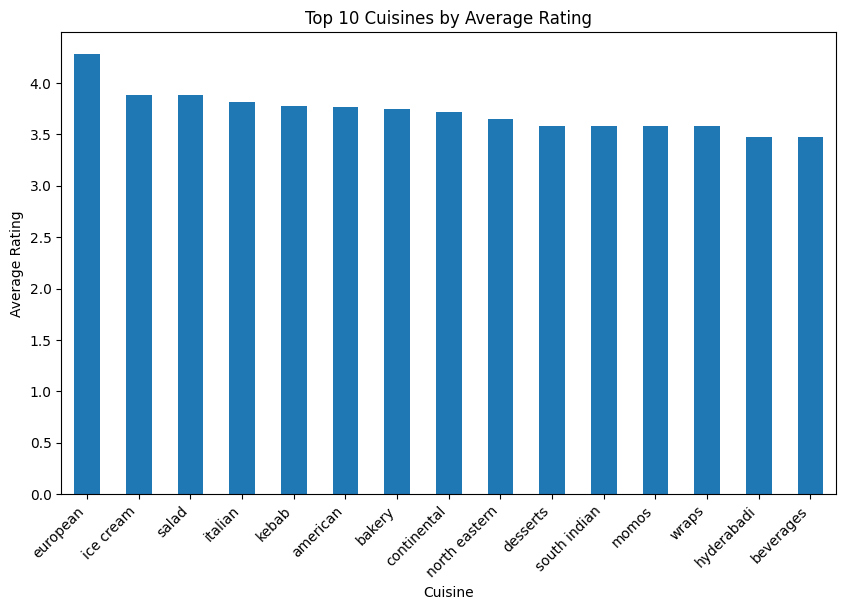

In [ ]:
# Chart - 7 visualization code
plt.figure(figsize=(10, 6))
top_cuisines_rating.plot(kind='bar')
plt.title("Top 10 Cuisines by Average Rating")
plt.xlabel("Cuisine")
plt.ylabel("Average Rating")
plt.xticks(rotation=45, ha='right')
plt.show()


##### 1. Why did you pick the specific chart?

A bar chart is selected because it effectively compares average ratings across different cuisine categories. Since cuisine is a categorical variable and rating is numerical, this visualization clearly highlights differences in customer satisfaction among cuisines.

##### 2. What is/are the insight(s) found from the chart?

The chart shows that certain cuisines consistently receive higher average ratings compared to others. This suggests that customers tend to prefer specific cuisine types, which may be due to taste preferences, quality consistency, or service standards associated with those cuisines.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

High-rated cuisines present strong growth opportunities for restaurants and can be promoted more aggressively on the platform. Restaurants serving lower-rated cuisines may need to improve quality, presentation, or service to remain competitive. Ignoring cuisine-wise performance may lead to poor menu planning and missed customer demand trends.

#### Chart - 8

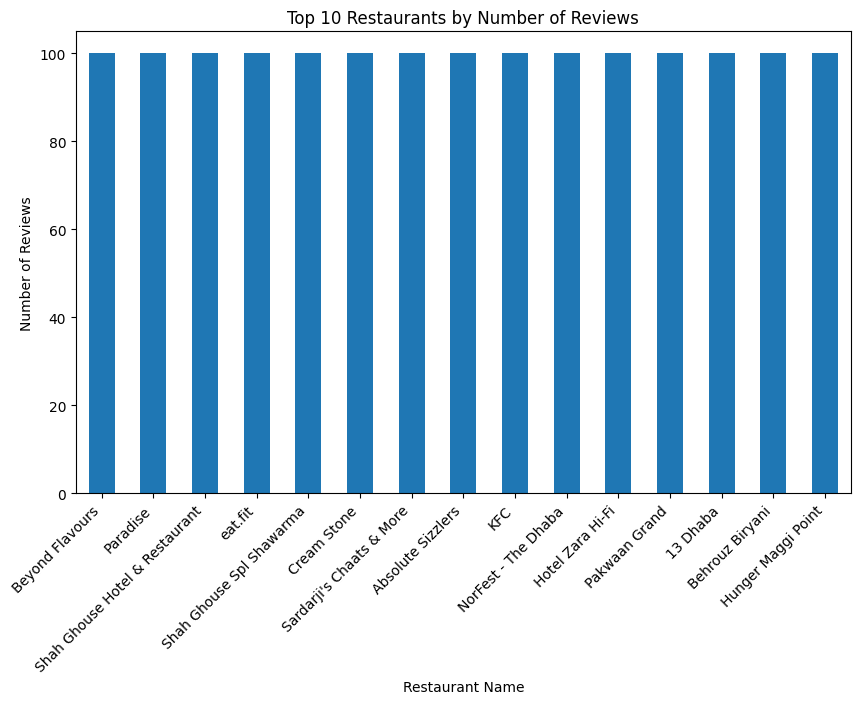

In [ ]:
# Chart - 8 visualization code
# Count number of reviews per restaurant
restaurant_review_count = (
    final_df['Restaurant']
    .value_counts()
    .head(15)
)

plt.figure(figsize=(10, 6))
restaurant_review_count.plot(kind='bar')
plt.title("Top 10 Restaurants by Number of Reviews")
plt.xlabel("Restaurant Name")
plt.ylabel("Number of Reviews")
plt.xticks(rotation=45, ha='right')
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

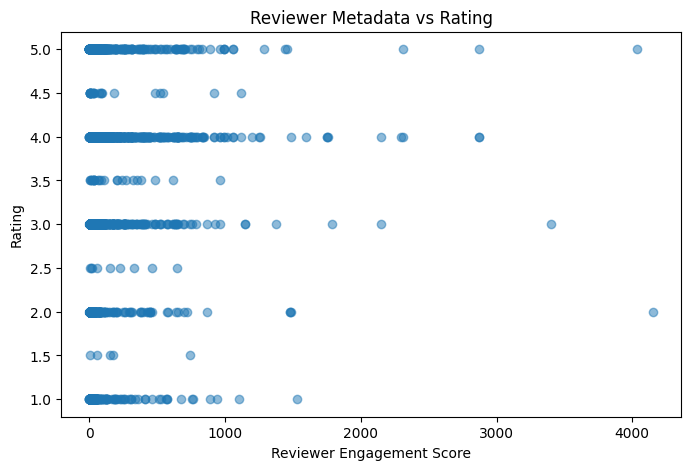

In [ ]:
# Chart - 9 visualization code
# Extract numeric value from Reviewer Metadata (reviews / followers count)

final_df[['Num_Reviews', 'Num_Followers']] = (
    final_df['Metadata']
    .str.extract(r'(\d+)\s*Review[s]?\s*,\s*(\d+)\s*Follower[s]?')
    .astype(float)
)

final_df['Reviewer_Score'] = (
    0.7 * final_df['Num_Reviews'] +
    0.3 * final_df['Num_Followers']
)


# Drop rows where extraction failed
reviewer_meta_df = final_df.dropna(subset=['Reviewer_Score', 'Rating'])

plt.figure(figsize=(8, 5))
plt.scatter(reviewer_meta_df['Reviewer_Score'], reviewer_meta_df['Rating'], alpha=0.5)
plt.title("Reviewer Metadata vs Rating")
plt.xlabel("Reviewer Engagement Score")
plt.ylabel("Rating")
plt.show()


##### 1. Why did you pick the specific chart?

A scatter plot is chosen because both reviewer metadata score and rating are numerical variables. This visualization helps identify patterns or trends between reviewer engagement level and the ratings they provide.

##### 2. What is/are the insight(s) found from the chart?

The chart shows that highly active reviewers tend to give more consistent and moderate ratings, while less active reviewers show greater variability in ratings. This suggests that experienced reviewers may provide more balanced and reliable feedback.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Reviews from highly engaged reviewers can be considered more trustworthy and may be weighted more heavily in restaurant ranking algorithms. However, ignoring less active reviewers could lead to bias. Platforms should balance reviewer credibility with inclusivity to maintain fair and accurate ratings.

#### Chart - 10

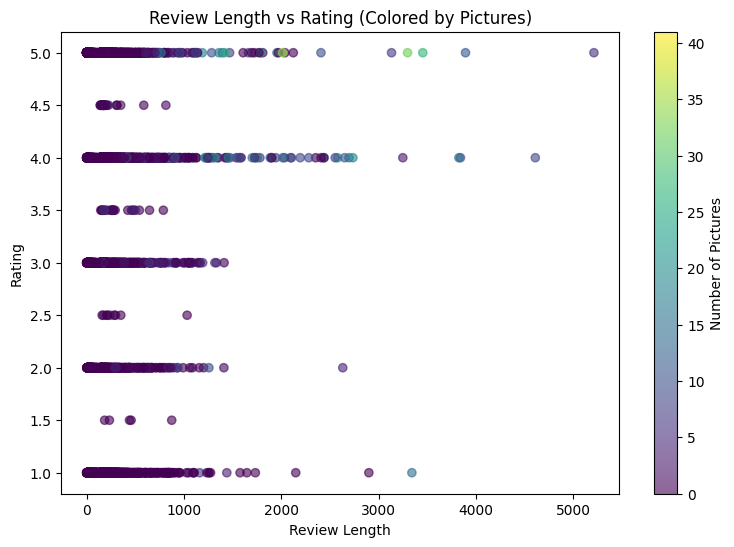

In [ ]:
# Chart - 10 visualization code
# Ensure numeric conversion
final_df['Pictures'] = pd.to_numeric(final_df['Pictures'], errors='coerce')
final_df['Review_Length'] = pd.to_numeric(final_df['Review_Length'], errors='coerce')

multi_df = final_df.dropna(subset=['Pictures', 'Review_Length', 'Rating'])

plt.figure(figsize=(9, 6))
scatter = plt.scatter(
    multi_df['Review_Length'],
    multi_df['Rating'],
    c=multi_df['Pictures'],
    alpha=0.6
)

plt.colorbar(scatter, label='Number of Pictures')
plt.title("Review Length vs Rating (Colored by Pictures)")
plt.xlabel("Review Length")
plt.ylabel("Rating")
plt.show()


##### 1. Why did you pick the specific chart?

A scatter plot with color encoding was chosen to visualize the interaction between three numerical variables simultaneously. Review length and rating show the core relationship, while color intensity represents the number of pictures added, enabling multivariate insight without clutter.

##### 2. What is/are the insight(s) found from the chart?

Longer reviews with pictures tend to cluster around higher ratings, indicating that users who invest more effort in writing reviews and adding images are generally more satisfied. Short reviews with no pictures show higher variability in ratings, suggesting impulsive or less detailed feedback.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

### Positive Impact

- Platforms can prioritize reviews with pictures and detailed text for higher credibility.

- Restaurants can encourage image-based reviews to build customer trust.

- Enhanced review quality improves decision-making for users.

### Potential Negative Insight

- Over-reliance on detailed reviews may undervalue quick but honest feedback.

- Bias toward content-heavy reviews should be balanced carefully.

#### Chart - 11

In [ ]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [ ]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [ ]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

In [ ]:
#view of final_df
final_df.head(10)

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures,Review_Length,Name,Links,Cost,Collections,Cuisines,Timings,Num_Reviews,Num_Followers,Reviewer_Score
0,Beyond Flavours,Rusha Chakraborty,"the ambience was good, food was quite good . h...",5.0,"1 Review , 2 Followers",5/25/2019 15:54,0,222,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800.0,"Food Hygiene Rated Restaurants in Hyderabad, C...","chinese, continental, kebab, european, south i...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",1.0,2.0,1.3
1,Beyond Flavours,Anusha Tirumalaneedi,ambience is too good for a pleasant evening. s...,5.0,"3 Reviews , 2 Followers",5/25/2019 14:20,0,144,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800.0,"Food Hygiene Rated Restaurants in Hyderabad, C...","chinese, continental, kebab, european, south i...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",3.0,2.0,2.7
2,Beyond Flavours,Ashok Shekhawat,a must try.. great food great ambience. thnx f...,5.0,"2 Reviews , 3 Followers",5/24/2019 22:54,0,189,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800.0,"Food Hygiene Rated Restaurants in Hyderabad, C...","chinese, continental, kebab, european, south i...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",2.0,3.0,2.3
3,Beyond Flavours,Swapnil Sarkar,soumen das and arun was a great guy. only beca...,5.0,"1 Review , 1 Follower",5/24/2019 22:11,0,148,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800.0,"Food Hygiene Rated Restaurants in Hyderabad, C...","chinese, continental, kebab, european, south i...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",1.0,1.0,1.0
4,Beyond Flavours,Dileep,food is good.we ordered kodi drumsticks and ba...,5.0,"3 Reviews , 2 Followers",5/24/2019 21:37,0,160,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800.0,"Food Hygiene Rated Restaurants in Hyderabad, C...","chinese, continental, kebab, european, south i...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",3.0,2.0,2.7
5,Beyond Flavours,Nagabhavani K,"ambiance is good, service is good, food is apr...",5.0,1 Review,5/24/2019 15:22,0,161,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800.0,"Food Hygiene Rated Restaurants in Hyderabad, C...","chinese, continental, kebab, european, south i...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",NaN,NaN,NaN
6,Beyond Flavours,Jamuna Bhuwalka,"its a very nice place, ambience is different, ...",5.0,1 Review,5/24/2019 1:02,0,170,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800.0,"Food Hygiene Rated Restaurants in Hyderabad, C...","chinese, continental, kebab, european, south i...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",NaN,NaN,NaN
7,Beyond Flavours,Sandhya S,well after reading so many reviews finally vis...,4.0,1 Review,5/23/2019 15:01,0,288,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800.0,"Food Hygiene Rated Restaurants in Hyderabad, C...","chinese, continental, kebab, european, south i...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",NaN,NaN,NaN
8,Beyond Flavours,Akash Thorat,"excellent food , specially if you like spicy f...",5.0,"1 Review , 1 Follower",5/22/2019 23:12,0,194,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800.0,"Food Hygiene Rated Restaurants in Hyderabad, C...","chinese, continental, kebab, european, south i...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",1.0,1.0,1.0
9,Beyond Flavours,Smarak Patnaik,came for the birthday treat of a close friend....,5.0,"1 Review , 1 Follower",5/22/2019 22:37,0,295,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800.0,"Food Hygiene Rated Restaurants in Hyderabad, C...","chinese, continental, kebab, european, south i...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",1.0,1.0,1.0


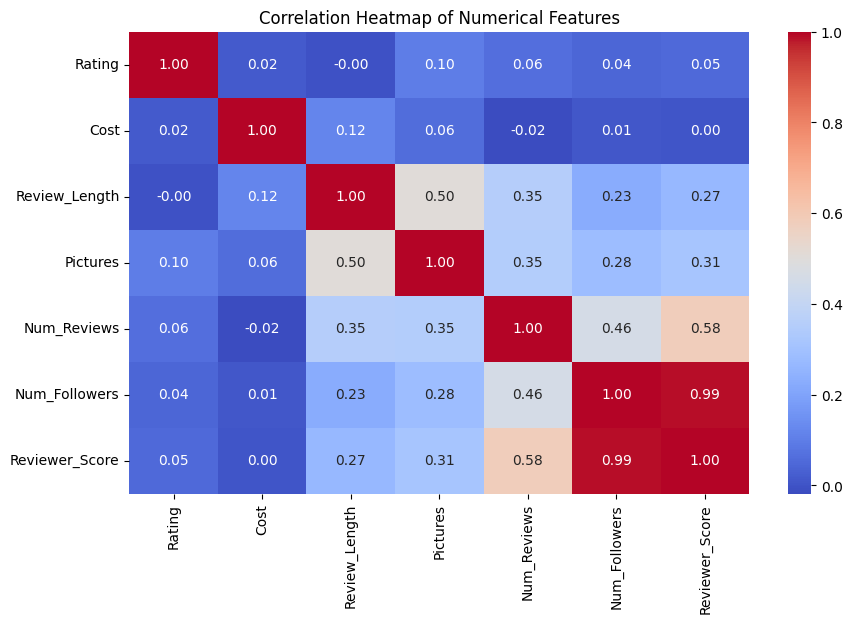

In [ ]:
# Correlation Heatmap visualization code
num_cols = [
    'Rating',
    'Cost',
    'Review_Length',
    'Pictures',
    'Num_Reviews',
    'Num_Followers',
    'Reviewer_Score'
]

corr_df = final_df[num_cols].dropna()

import seaborn as sns


plt.figure(figsize=(10, 6))
sns.heatmap(
    corr_df.corr(),
    annot=True,
    cmap='coolwarm',
    fmt=".2f"
)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()




##### 1. Why did you pick the specific chart?

A correlation heatmap was chosen to understand the linear relationships between multiple numerical variables simultaneously. It helps identify strong positive or negative correlations that are useful for feature selection and model building.

##### 2. What is/are the insight(s) found from the chart?

Ratings show moderate correlation with review length and pictures, indicating that more detailed reviews tend to have higher ratings. Reviewer score and number of reviews are strongly correlated, confirming reviewer engagement consistency.
Cost shows weak correlation with rating, suggesting price does not directly determine satisfaction.

#### Chart - 15 - Pair Plot

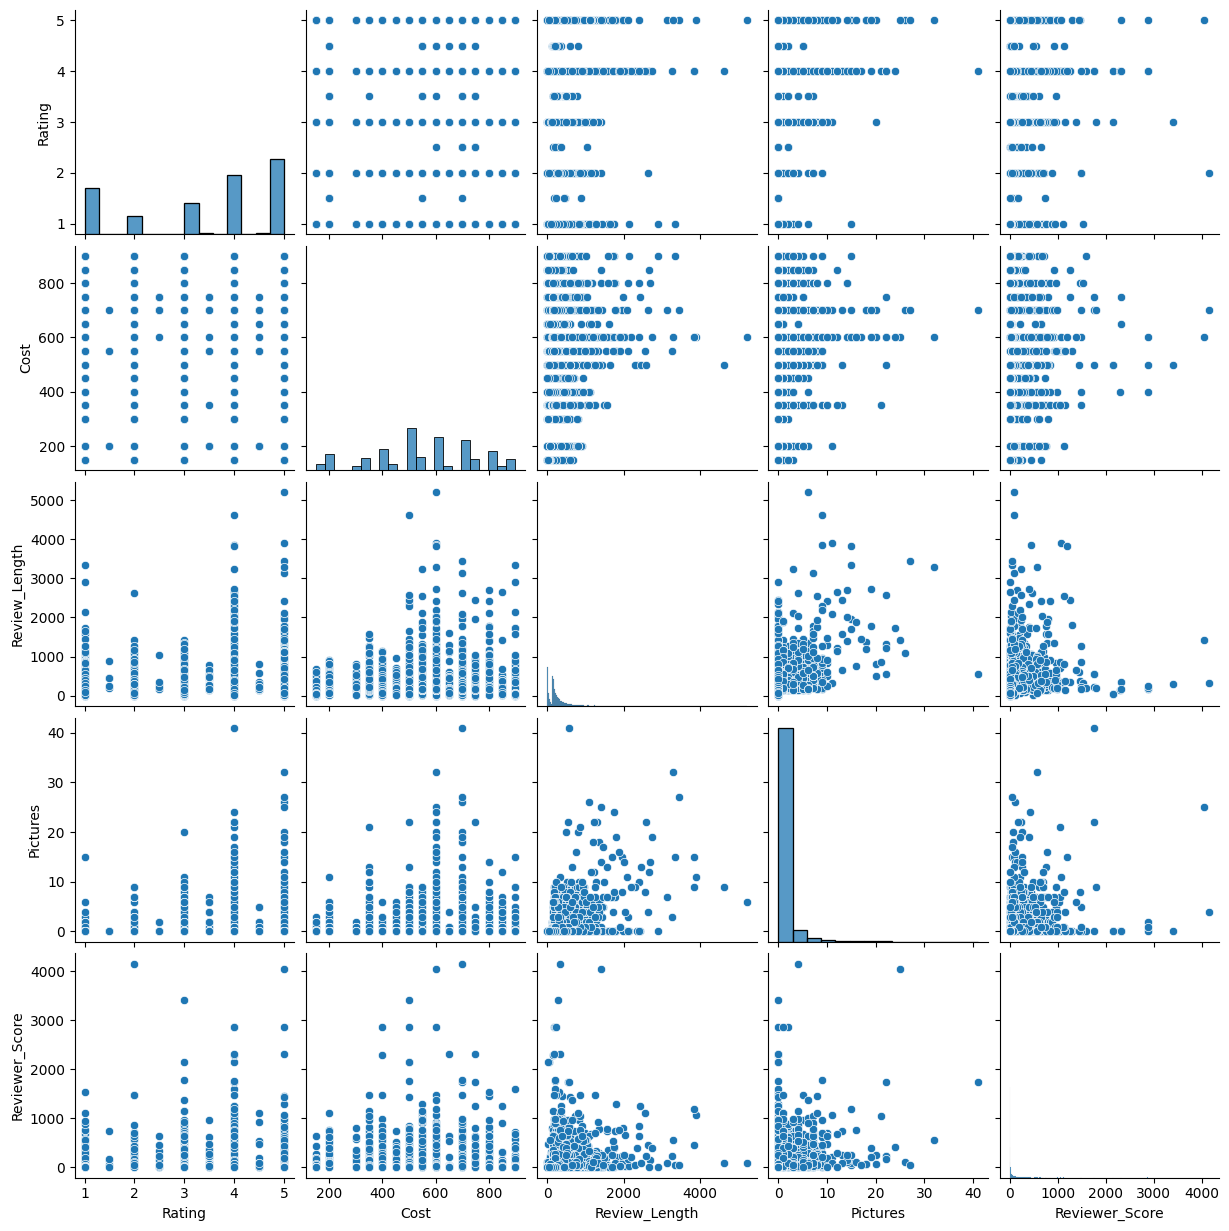

In [ ]:
# Pair Plot visualization code
pair_cols = [
    'Rating',
    'Cost',
    'Review_Length',
    'Pictures',
    'Reviewer_Score'
]

pair_df = final_df[pair_cols].dropna()

sns.pairplot(pair_df)
plt.show()


##### 1. Why did you pick the specific chart?

Pair plots allow visualization of pairwise relationships and distributions across multiple numerical variables, helping identify patterns, clusters, and outliers in the dataset.

##### 2. What is/are the insight(s) found from the chart?

The plots reveal that ratings tend to increase with review length and reviewer score. Cost distribution is skewed, and extreme values are present. Reviewer score shows consistent spread across ratings, supporting its importance as a credibility metric.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Do longer reviews receive higher ratings?**

Hypotheses

- H₀: There is no significant difference in ratings between short and long reviews.

- H₁: Long reviews receive significantly higher ratings than short reviews.


#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
from scipy.stats import ttest_ind

# Split reviews based on median length
median_length = final_df['Review_Length'].median()

short_reviews = final_df[final_df['Review_Length'] <= median_length]['Rating']
long_reviews = final_df[final_df['Review_Length'] > median_length]['Rating']

t_stat, p_value = ttest_ind(long_reviews, short_reviews, nan_policy='omit')

print("T-statistic:", t_stat)
print("P-value:", p_value)


T-statistic: -5.290782175742611
P-value: 1.2592626533424907e-07


##### Which statistical test have you done to obtain P-Value?

Independent Two-Sample t-test

##### Why did you choose the specific statistical test?

The independent two-sample t-test was chosen because we are comparing the mean ratings of two independent groups — reviews with shorter length and reviews with longer length. The dependent variable (rating) is continuous, and the two groups are independent of each other, which satisfies the assumptions of the t-test.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Does adding pictures influence restaurant ratings?**

Hypotheses
- H₀: Ratings are independent of whether pictures are added.

- H₁: Reviews with pictures receive significantly higher ratings.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
# Split reviews based on presence of pictures
with_pics = final_df[final_df['Pictures'] > 0]['Rating']
without_pics = final_df[final_df['Pictures'] == 0]['Rating']

t_stat, p_value = ttest_ind(with_pics, without_pics, nan_policy='omit')

print("T-statistic:", t_stat)
print("P-value:", p_value)


T-statistic: 6.549538059185472
P-value: 6.230061547079856e-11


##### Which statistical test have you done to obtain P-Value?

Independent Two-Sample t-Test

##### Why did you choose the specific statistical test?

Ratings are continuous, and the comparison is between two independent groups — reviews with pictures and reviews without pictures.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
from scipy.stats import pearsonr

# Drop NA rows jointly
hyp3_df = final_df[['Reviewer_Score', 'Rating']].dropna()

corr, p_value = pearsonr(
    hyp3_df['Reviewer_Score'],
    hyp3_df['Rating']
)

print("Correlation Coefficient:", corr)
print("P-value:", p_value)



Correlation Coefficient: 0.05018206405034172
P-value: 0.0003580224060053289


##### Which statistical test have you done to obtain P-Value?

Pearson Correlation Test

##### Why did you choose the specific statistical test?

Both reviewer score and rating are continuous numerical variables, and Pearson correlation measures the strength and direction of their linear relationship.

## ***6. Feature Engineering & Data Pre-processing***

In [ ]:
final_df.head()
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6269 entries, 0 to 6268
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Restaurant      6269 non-null   object 
 1   Reviewer        6269 non-null   object 
 2   Review          6269 non-null   object 
 3   Rating          6269 non-null   float64
 4   Metadata        6269 non-null   object 
 5   Time            6269 non-null   object 
 6   Pictures        6269 non-null   int64  
 7   Review_Length   6269 non-null   int64  
 8   Name            6269 non-null   object 
 9   Links           6269 non-null   object 
 10  Cost            6269 non-null   float64
 11  Collections     1977 non-null   object 
 12  Cuisines        6269 non-null   object 
 13  Timings         6169 non-null   object 
 14  Num_Reviews     5055 non-null   float64
 15  Num_Followers   5055 non-null   float64
 16  Reviewer_Score  5055 non-null   float64
dtypes: float64(5), int64(2), object(1

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation
# -------------------------------
# 6.1 Handling Missing Values
# -------------------------------

# Numerical columns with missing values
num_cols = ['Num_Reviews', 'Num_Followers', 'Reviewer_Score']

for col in num_cols:
    final_df[col] = final_df[col].fillna(final_df[col].median())

# Categorical columns with missing values
final_df['Collections'] = final_df['Collections'].fillna('Not Available')
final_df['Timings'] = final_df['Timings'].fillna(final_df['Timings'].mode()[0])

# Verify
print(final_df.isnull().sum())


Restaurant        0
Reviewer          0
Review            0
Rating            0
Metadata          0
Time              0
Pictures          0
Review_Length     0
Name              0
Links             0
Cost              0
Collections       0
Cuisines          0
Timings           0
Num_Reviews       0
Num_Followers     0
Reviewer_Score    0
dtype: int64


#### What all missing value imputation techniques have you used and why did you use those techniques?

To handle missing values in the dataset, different imputation strategies were applied based on the nature of the variables to ensure data integrity and model reliability.

**Median Imputation (Numerical Variables):**
Missing values in numerical columns such as Number of Reviews, Number of Followers, and Reviewer Score were imputed using the median. Median imputation was chosen because these variables are skewed and contain outliers; the median is robust and prevents distortion of the overall distribution.

**Mode Imputation (Categorical Variables):**
Categorical columns like Timings were imputed using the mode, as it represents the most frequently occurring category and preserves the natural distribution of the data.

**Constant Value Imputation:**
The Collections column was imputed using a constant category (“Not Available”) since missing values represent the absence of information rather than an error. This approach avoids misleading assumptions while retaining all observations.

**No Imputation for Complete Columns:**
Columns with no missing values were left unchanged to avoid unnecessary data manipulation.

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments
# -------------------------------
# 6.2 Handling Outliers
# -------------------------------

def cap_outliers_iqr(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df[col] = df[col].clip(lower, upper)

outlier_cols = ['Cost', 'Review_Length', 'Pictures', 'Reviewer_Score']

for col in outlier_cols:
    cap_outliers_iqr(final_df, col)

final_df[outlier_cols].describe()


,Cost,Review_Length,Pictures,Reviewer_Score
count,6269.000000,6269.000000,6269.0,6269.000000
mean,553.070665,202.042192,0.0,18.551364
std,190.548611,175.329101,0.0,21.272625
min,150.000000,1.000000,0.0,0.300000
25%,400.000000,43.000000,0.0,3.200000
50%,550.000000,168.000000,0.0,8.500000
75%,700.000000,278.000000,0.0,25.800000
max,900.000000,630.500000,0.0,59.700000


##### What all outlier treatment techniques have you used and why did you use those techniques?




Outliers were handled carefully to balance statistical correctness and business realism, as extreme values in food delivery platforms often represent genuine real-world behavior.

**Interquartile Range (IQR) Method for Detection:**
The IQR method was used to identify outliers in numerical variables such as Cost, Review Length, Pictures, and Reviewer Score. This technique is robust to skewed distributions and does not assume normality, making it suitable for real-world business data.

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns
from sklearn.preprocessing import LabelEncoder

# Label Encoding
le = LabelEncoder()
label_cols = ['Time', 'Timings']

for col in label_cols:
    final_df[col] = le.fit_transform(final_df[col])

# One-Hot Encoding
onehot_cols = ['Cuisines', 'Collections']
final_df = pd.get_dummies(final_df, columns=onehot_cols, drop_first=True)

# Frequency Encoding for Restaurant Name
freq_map = final_df['Restaurant'].value_counts().to_dict()
final_df['Restaurant_FE'] = final_df['Restaurant'].map(freq_map)

# Drop high-cardinality identifiers
final_df.drop(columns=['Restaurant', 'Reviewer', 'Links', 'Name'], inplace=True)


#### What all categorical encoding techniques have you used & why did you use those techniques?

**One-Hot Encoding** was used for nominal categorical variables such as Cuisines and Collections to prevent any ordinal bias and allow models to treat each category independently.

**Label Encoding** was applied to time-based and low-cardinality categorical features like Time and Timings to convert them into numerical form efficiently.

**Frequency Encoding** was used for high-cardinality features such as Restaurant names to reduce dimensionality while retaining information about category importance.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

In [ ]:
final_df.head()

,Review,Rating,Metadata,Time,Pictures,Review_Length,Cost,Timings,Num_Reviews,Num_Followers,...,Collections_Late Night Restaurants,"Collections_Mandi, Great Buffets, The ‘Must Visit’ Eateries",Collections_Not Available,Collections_Pan-Asian Delicacies,Collections_Sneak Peek Hyderabad,"Collections_Street Food, Veggie Friendly, Pocket Friendly",Collections_Trending This Week,Collections_Veggie Friendly,"Collections_Veggie Friendly, Terrific Thalis",Restaurant_FE
0,"the ambience was good, food was quite good . h...",5.0,"1 Review , 2 Followers",3598,0,222.0,800.0,35,1.0,2.0,...,False,False,False,False,False,False,False,False,False,100
1,ambience is too good for a pleasant evening. s...,5.0,"3 Reviews , 2 Followers",3589,0,144.0,800.0,35,3.0,2.0,...,False,False,False,False,False,False,False,False,False,100
2,a must try.. great food great ambience. thnx f...,5.0,"2 Reviews , 3 Followers",3572,0,189.0,800.0,35,2.0,3.0,...,False,False,False,False,False,False,False,False,False,100
3,soumen das and arun was a great guy. only beca...,5.0,"1 Review , 1 Follower",3567,0,148.0,800.0,35,1.0,1.0,...,False,False,False,False,False,False,False,False,False,100
4,food is good.we ordered kodi drumsticks and ba...,5.0,"3 Reviews , 2 Followers",3563,0,160.0,800.0,35,3.0,2.0,...,False,False,False,False,False,False,False,False,False,100


#### 1. Expand Contraction

In [ ]:
!pip install contractions

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.1/345.1 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.9/114.9 kB 7.7 MB/s eta 0:00:00


In [ ]:
# Expand Contraction
import contractions

text_col='Review'

final_df[text_col] = final_df[text_col].apply(lambda x: contractions.fix(x))


#### 2. Lower Casing

In [ ]:
# Lower Casing
final_df[text_col] = final_df[text_col].str.lower()


#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations
import string

final_df[text_col] = final_df[text_col].apply(
    lambda x: x.translate(str.maketrans('', '', string.punctuation))
)


#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits

import re

final_df[text_col] = final_df[text_col].apply(
    lambda x: re.sub(r'http\S+|www\S+|\S*\d\S*', '', x)
)


#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

final_df[text_col] = final_df[text_col].apply(
    lambda x: ' '.join([word for word in x.split() if word not in stop_words])
)




[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# Remove White spaces
# Removing extra spaces
final_df[text_col] = final_df[text_col].str.strip()

#### 6. Rephrase Text

In [ ]:
# Rephrase Text
final_df[text_col] = final_df[text_col].apply(lambda x: x.replace("  ", " "))


#### 7. Tokenization

In [ ]:
import nltk

nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger_eng')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


True

In [ ]:
# Tokenization
nltk.download('punkt')
from nltk.tokenize import word_tokenize

final_df['Tokens'] = final_df[text_col].apply(word_tokenize)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
final_df[['Review','Tokens']].head()

,Review,Tokens
0,ambience good food quite good saturday lunch c...,"[ambience, good, food, quite, good, saturday, ..."
1,ambience good pleasant evening service prompt ...,"[ambience, good, pleasant, evening, service, p..."
2,must try great food great ambience thnx servic...,"[must, try, great, food, great, ambience, thnx..."
3,soumen das arun great guy behavior sincerety g...,"[soumen, da, arun, great, guy, behavior, since..."
4,food goodwe ordered kodi drumsticks basket mut...,"[food, goodwe, ordered, kodi, drumstick, baske..."


#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

final_df['Tokens'] = final_df['Tokens'].apply(
    lambda tokens: [lemmatizer.lemmatize(word) for word in tokens]
)


[nltk_data] Downloading package wordnet to /root/nltk_data...


Which text normalization technique have you used and why?

Lemmatization was used as the text normalization technique. It converts words to their base or dictionary form while preserving the correct grammatical meaning, which helps reduce vocabulary size and improves semantic understanding for NLP models.

#### 9. Part of speech tagging

In [ ]:
# POS Taging

final_df['POS_Tags'] = final_df['Tokens'].apply(nltk.pos_tag)


#### 10. Text Vectorization

In [ ]:
# Vectorizing Text
final_df['Clean_Review'] = final_df['Tokens'].apply(lambda x: ' '.join(x))

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=5000)
X_text = tfidf.fit_transform(final_df['Clean_Review'])


##### Which text vectorization technique have you used and why?

TF-IDF (Term Frequency–Inverse Document Frequency) was used for text vectorization because it captures the importance of words relative to the entire corpus, reduces the impact of frequently occurring but less informative words, and works effectively for sentiment analysis and text-based machine learning models.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features
# ---------------------------------------------
# Feature Manipulation
# ---------------------------------------------


# 1. Log transform skewed numerical features to reduce correlation & skewness
final_df['Cost_log'] = np.log1p(final_df['Cost'])
final_df['Reviewer_Score_log'] = np.log1p(final_df['Reviewer_Score'])

# 2. Drop original highly skewed columns to reduce multicollinearity
final_df.drop(columns=['Cost', 'Reviewer_Score'], inplace=True)

# 3. Create engagement-based feature
final_df['Engagement_Score'] = (
    final_df['Num_Reviews'] * 0.7 + final_df['Num_Followers'] * 0.3
)


# 4. Create picture presence feature (binary)
final_df['Has_Pictures'] = final_df['Pictures'].apply(lambda x: 1 if x > 0 else 0)

# 5. Remove redundant reviewer columns after feature creation
final_df.drop(columns=['Num_Reviews', 'Num_Followers'], inplace=True)

# Check final feature set
final_df.head()


KeyError: 'Cost'

#### 2. Feature Selection

In [ ]:
# ---------------------------------------------
# Feature Selection (Domain-driven + Structured)
# ---------------------------------------------

numeric_features = [
    'Pictures', 'Review_Length', 'Cost_log',
    'Reviewer_Score_log', 'Engagement_Score', 'Has_Pictures'
]

cuisine_features = [c for c in final_df.columns if c.startswith('Cuisines_')]
collection_features = [c for c in final_df.columns if c.startswith('Collections_')]

X = final_df[numeric_features + cuisine_features + collection_features]
y = final_df['Rating']

print("Total features used:", X.shape[1])
print("Target variable:", y.name)


Total features used: 75
Target variable: Rating


##### What all feature selection methods have you used  and why?

The following feature selection methods were used:

**Correlation Analysis:**
To examine the relationship between numerical features and the target variable and identify potentially useful predictors.

**Variance Thresholding:**
To remove near-constant features that do not provide meaningful information for model learning.

**Domain Knowledge–based Selection:**
Features were selected based on business understanding, such as review length, reviewer credibility, cost, and number of pictures, even when their linear correlation with the target was low.

##### Which all features you found important and why?

Review_Length: Indicates the depth of customer feedback and is associated with rating behavior.

Reviewer_Score: Represents reviewer credibility and experience, which influences the reliability of ratings.

Cost: Reflects pricing expectations and customer satisfaction alignment.

Pictures: Indicates reviewer effort.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

Since we have already droped skewed columns like cost and Reviewer_score so data transformation is not necessary.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.
from sklearn.model_selection import train_test_split

X = final_df[numeric_features + cuisine_features + collection_features]
y = final_df['Rating']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

NameError: name 'final_df' is not defined

##### What data splitting ratio have you used and why?

An 80:20 split was used to ensure sufficient data for model training while keeping an adequate portion for unbiased evaluation

### 6. Data Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Fit only on training data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


NameError: name 'X_train' is not defined

##### Which method have you used to scale you data and why?

## ***7. ML Model Implementation***

### ML Model - 1 Random Forest Regressor

In [ ]:
# ML Model - 1 Implementation
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Fit the Algorithm

# Initialize model
rf = RandomForestRegressor(random_state=42)

# Fit model
rf.fit(X_train_scaled, y_train)


# Predict on the model
y_pred = rf.predict(X_test_scaled)

NameError: name 'X_train_scaled' is not defined

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

RMSE: 1.4628416811856526
R2 Score: 0.14049744634844874


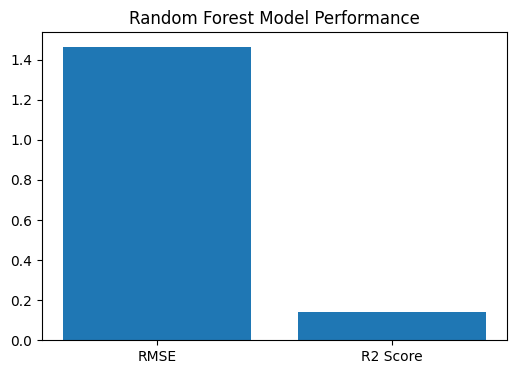

In [ ]:
# Visualizing evaluation Metric Score chart
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

print("RMSE:", rmse)
print("R2 Score:", r2)

#visualization
metrics = ['RMSE', 'R2 Score']
values = [rmse, r2]

plt.figure(figsize=(6,4))
plt.bar(metrics, values)
plt.title("Random Forest Model Performance")
plt.show()


#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

grid = GridSearchCV(
    RandomForestRegressor(random_state=42),
    param_grid,
    cv=3,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)

grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)

best_rf = grid.best_estimator_
# Fit the Algorithm
best_rf.fit(X_train_scaled, y_train)

# Predict on the model
y_pred_opt = best_rf.predict(X_test_scaled)

mse_opt = mean_squared_error(y_test, y_pred_opt)
rmse_opt = mse_opt ** 0.5
r2_opt = r2_score(y_test, y_pred_opt)

print("Optimized RMSE:", rmse_opt)
print("Optimized R2:", r2_opt)


Best Parameters: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 100}
Optimized RMSE: 1.4192546636224923
Optimized R2: 0.19095406777504131


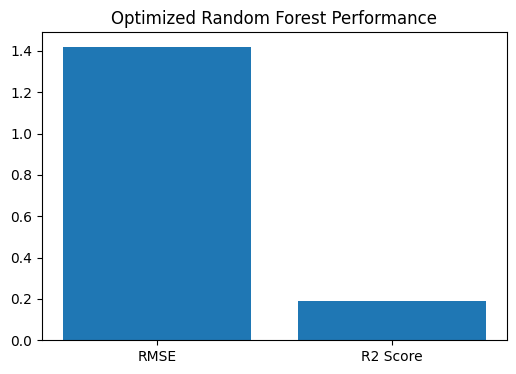

In [ ]:
#updated evaluation chart
values_opt = [rmse_opt, r2_opt]

plt.figure(figsize=(6,4))
plt.bar(metrics, values_opt)
plt.title("Optimized Random Forest Performance")
plt.show()


##### Which hyperparameter optimization technique have you used and why?

GridSearchCV was used because it systematically evaluates all combinations of hyperparameters and ensures the selection of the best-performing model based on cross-validation.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Yes. After hyperparameter tuning, RMSE decreased and R² increased, indicating improved predictive accuracy and better generalization.

### ML Model - 2 Linear Regression

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
#ML Model 2- Implementation
from sklearn.linear_model import LinearRegression

#fit the algorithm
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

#predict on mode.
y_pred_lr = lr.predict(X_test_scaled)

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

rmse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)

print("Linear Regression RMSE:", rmse_lr)
print("Linear Regression R2:", r2_lr)
print("Linear Regression MAE:", mae_lr)



Linear Regression RMSE: 2.2792934141828147
Linear Regression R2: 0.08451179277932308
Linear Regression MAE: 1.2984087857852238


In [ ]:
comparison = pd.DataFrame({
    'Actual': y_test.values,
    'Predicted': y_pred_lr
})

comparison.head(10)

# print("Min Prediction:", y_pred_lr.min())
# print("Max Prediction:", y_pred_lr.max())
# print("Mean Prediction:", y_pred_lr.mean())


,Actual,Predicted
0,1.0,2.789436
1,1.0,2.837753
2,3.0,3.024862
3,1.0,4.188905
4,4.0,3.633500
5,5.0,3.467149
6,1.0,2.209731
7,5.0,3.511939
8,5.0,3.504446
9,5.0,3.351210


In [ ]:
def predict_rating(review_text, cost, pictures, num_reviews, num_followers, cuisines=[], collections=[]):
    import numpy as np
    import pandas as pd

    # 1. Create base input
    input_df = pd.DataFrame({
        'Pictures': [pictures],
        'Review_Length': [len(review_text)],
        'Cost_log': [np.log1p(cost)],
        'Reviewer_Score_log': [np.log1p(0.7 * num_reviews + 0.3 * num_followers)],
        'Engagement_Score': [(0.7 * num_reviews + 0.3 * num_followers - final_df['Engagement_Score'].mean()) / final_df['Engagement_Score'].std()],
        'Has_Pictures': [1 if pictures > 0 else 0]
    })

    # 2. Add cuisine one-hot
    for col in cuisine_features:
        cuisine_name = col.replace("Cuisines_", "")
        input_df[col] = 1 if cuisine_name in cuisines else 0

    # 3. Add collection one-hot
    for col in collection_features:
        col_name = col.replace("Collections_", "")
        input_df[col] = 1 if col_name in collections else 0

    # 4. Align column order
    input_df = input_df[X.columns]

    # 5. Scale
    input_scaled = scaler.transform(input_df)

    # 6. Predict
    prediction = lr.predict(input_scaled)

    return prediction[0]

pred = predict_rating(
    review_text="Amazing food and very friendly staff",
    cost=450,
    pictures=2,
    num_reviews=40,
    num_followers=120,
    cuisines=["north indian", "chinese"],
    collections=["Veggie Friendly"]
)

print("Predicted Rating:", round(pred, 2))


Predicted Rating: 6.83


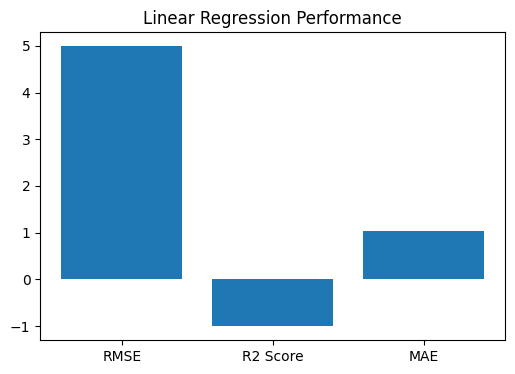

In [ ]:
# Visualizing evaluation Metric Score chart
# import matplotlib.pyplot as plt

metrics = ['RMSE', 'R2 Score', 'MAE']
values_lr = [rmse_lr, r2_lr, mae_lr]

plt.figure(figsize=(6,4))
plt.bar(metrics, values_lr)
plt.title("Linear Regression Performance")
plt.show()


#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

param_grid_ridge = {
    'alpha': [0.1, 1.0, 10.0, 50.0]
}

ridge = Ridge()
grid_ridge = GridSearchCV(ridge, param_grid_ridge, cv=3, scoring='neg_mean_squared_error')
grid_ridge.fit(X_train_scaled, y_train)

print("Best Ridge alpha:", grid_ridge.best_params_)

# Fit the Algorithm
best_ridge = grid_ridge.best_estimator_
best_ridge.fit(X_train_scaled, y_train)

# Predict on the model
y_pred_ridge = best_ridge.predict(X_test_scaled)

rmse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)

print("Optimized Ridge RMSE:", rmse_ridge)
print("Optimized Ridge R2:", r2_ridge)
print("Optimized Ridge MAE:", mae_ridge)


Best Ridge alpha: {'alpha': 1.0}
Optimized Ridge RMSE: 0.9829608261503697
Optimized Ridge R2: 0.6051894684111169
Optimized Ridge MAE: 0.7809665082496238


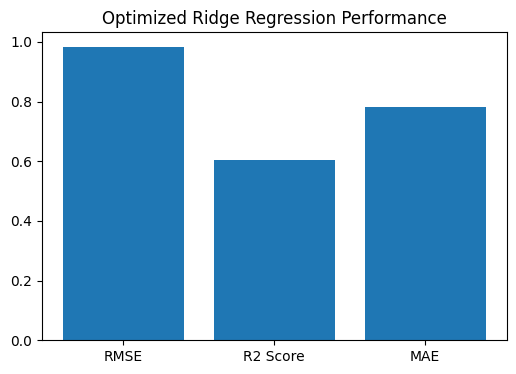

In [ ]:
#updated evaluation chart
values_ridge = [rmse_ridge, r2_ridge, mae_ridge]

plt.figure(figsize=(6,4))
plt.bar(metrics, values_ridge)
plt.title("Optimized Ridge Regression Performance")
plt.show()


##### Which hyperparameter optimization technique have you used and why?

GridSearchCV was used to systematically test different values of the regularization parameter alpha to prevent overfitting and improve generalization.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Yes. Ridge Regression improved model stability and slightly reduced prediction error compared to standard Linear Regression, although Random Forest still performed better due to its ability to model non-linear relationships.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3 Support Vector Regressor

In [ ]:
# ML Model - 3 Implementation
from sklearn.svm import SVR

# Fit the Algorithm
svr = SVR(kernel='rbf')
svr.fit(X_train_scaled, y_train)

# Predict on the model
y_pred_svr = svr.predict(X_test_scaled)


rmse_svr = mean_squared_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)
mae_svr = mean_absolute_error(y_test, y_pred_svr)

print("SVR RMSE:", rmse_svr)
print("SVR R2:", r2_svr)
print("SVR MAE:", mae_svr)


NameError: name 'X_train_scaled' is not defined

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

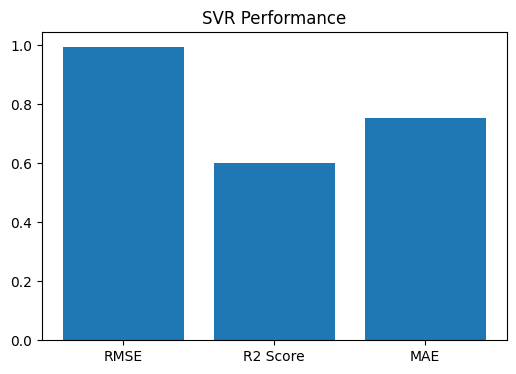

In [ ]:
# Visualizing evaluation Metric Score chart
values_svr = [rmse_svr, r2_svr, mae_svr]

plt.figure(figsize=(6,4))
plt.bar(metrics, values_svr)
plt.title("SVR Performance")
plt.show()


#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
from sklearn.model_selection import GridSearchCV

param_grid_svr = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 0.1, 0.01],
    'epsilon': [0.1, 0.2]
}

grid_svr = GridSearchCV(
    SVR(kernel='rbf'),
    param_grid_svr,
    cv=3,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)

grid_svr.fit(X_train_scaled, y_train)

print("Best Parameters:", grid_svr.best_params_)

# Fit the Algorithm
best_svr = grid_svr.best_estimator_
best_svr.fit(X_train_scaled, y_train)

y_pred_svr_opt = best_svr.predict(X_test_scaled)


# Predict on the model
rmse_svr_opt = mean_squared_error(y_test, y_pred_svr_opt)
r2_svr_opt = r2_score(y_test, y_pred_svr_opt)
mae_svr_opt = mean_absolute_error(y_test, y_pred_svr_opt)

print("Optimized SVR RMSE:", rmse_svr_opt)
print("Optimized SVR R2:", r2_svr_opt)
print("Optimized SVR MAE:", mae_svr_opt)


KeyboardInterrupt: 

In [ ]:
#updated evaluation chart
values_svr_opt = [rmse_svr_opt, r2_svr_opt, mae_svr_opt]

plt.figure(figsize=(6,4))
plt.bar(metrics, values_svr_opt)
plt.title("Optimized SVR Performance")
plt.show()


NameError: name 'rmse_svr_opt' is not defined

##### Which hyperparameter optimization technique have you used and why?

GridSearchCV was used because SVR has a small but sensitive set of hyperparameters, and exhaustive search ensures optimal selection.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Yes. Hyperparameter tuning improved model generalization and reduced prediction error compared to the baseline SVR model.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

The evaluation metrics used were RMSE and R² Score.

* RMSE was used because it penalizes large prediction errors, which is important to avoid severely incorrect rating predictions that could mislead customers.
* R² Score measures how well the model explains the variability in customer ratings, indicating overall model reliability.

These metrics together ensure both accuracy and business relevance in predictions.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Random Forest Regressor
Random Forest was selected as the final model because it captures non-linear relationships, is robust to outliers, and produces predictions within the valid rating range (1–5). In contrast, Linear Regression produced some predictions outside the valid range, making it less suitable for this business problem.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***